<a href="https://colab.research.google.com/github/DanilAra7/C1/blob/main/ClassifyNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

print(tf.__version__)

2.15.0


In [ ]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training when the loss falls below 0.4

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check the loss
    if(logs.get('loss') < 0.4):

      # Stop if threshold is met
      print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
# Load the training and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


LABEL: {training_labels[index]}

IMAGE PIXEL ARRAY:
 [[  0   0   1   0   0   0   1   0   0   0  36 137  59  43  24  24  44 107 102   0   0   0   2   0   0   1   0   0]
 [  0   0   1   0   0   1   1   0 145 151  57 240 188 194 211 204 205 189 243  59   4   0   0   1   0   1   0   0]
 [  0   0   0   0   0   4   0  37 243  72   0 208 210 178 162 149 161 199 138  56 200 207   6   0   2   0   0   0]
 [  0   0   0   0   3   0   0 133 205 175 179 168 192 192 162 156 185 215 175 176 169 217  34   0   8   4   1   0]
 [  0   0   0   2   0   7 145 182 205 218 242 225 221 230 119 160 221 216 255 235 231 227  60   0   2   1   1   0]
 [  0   0   1   0   0 182 176 136 129 141 190 202 197 204 147 188 186 179 166 157 153 162 204  89   0   0   0   0]
 [  0   0   3   0  89 206 159 151 179 141 128 137 133 156 160 151 134 147 143 153 145 168 166 230  24   0   1   0]
 [  0   0   3   0 176 199 198 156 161 171 148 149 158 155 143 157 161 155 155 167 160 196 180 217 135   0   1   0]
 [  0   0   0   4 177 196 2

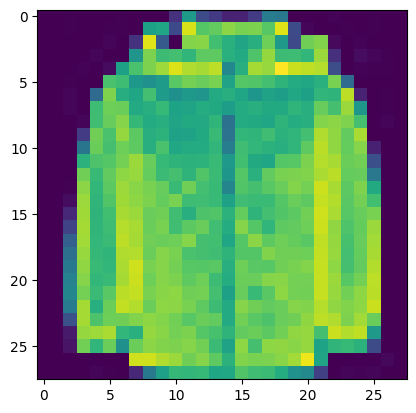

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 555

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL: {training_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {training_images[index]}')

# Visualize the image
plt.imshow(training_images[index])

In [ ]:
# Normalize the pixel values of the train and test images
training_images  = training_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(512, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [ ]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
1875/1875 [==============================] - 15s 7ms/step - loss: 0.8913 - accuracy: 0.7070
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.5558 - accuracy: 0.8016
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4951 - accuracy: 0.8255
Epoch 4/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4624 - accuracy: 0.8362
Epoch 5/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4411 - accuracy: 0.8442
Epoch 6/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.4261 - accuracy: 0.8491
Epoch 7/10
1875/1875 [==============================] - 12s 7ms/step - loss: 0.4128 - accuracy: 0.8541
Epoch 8/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.4021 - accuracy: 0.8576
Epoch 9/10
1870/1875 [============================>.] - ETA: 0s - loss: 0.3930 - accuracy: 0.8603
Loss is lower than 0.4 so cancelling training!
1875/1875 [====================

In [ ]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 2s 4ms/step - loss: 0.4238 - accuracy: 0.8506


[0.4238153398036957, 0.850600004196167]

In [ ]:
classifications = model.predict(test_images)

print(classifications[0])

313/313 [==============================] - 1s 2ms/step
[1.1320708e-06 2.7678476e-07 1.4030529e-07 3.2060058e-08 4.1845098e-07 7.4065171e-02 6.9210778e-06 1.7021576e-01 1.0225208e-05 7.5569993e-01]


In [ ]:
print(test_labels[0])

9
